In [89]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from math import floor


In [90]:
def ValidationSetApproach(X, Y):
    GEs1, GEs2, GEs3 = [], [], []
    ks = [k for k in range(1,22)]
    training_data_X = np.array(X[10:])
    training_data_Y = np.array(Y[10:])
    validation_set_X = np.array(X[:10])
    validation_set_Y = np.array(Y[:10])
    for k in range(1,22):
        trainer = KNeighborsRegressor(n_neighbors = k)
        trainer.fit(training_data_X, training_data_Y)
        prediction = np.array(trainer.predict(validation_set_X))
        loss_array = validation_set_Y - prediction
        loss_array **= 2
        loss = loss_array.sum() / len(validation_set_Y)
        GEs1.append(loss)
    training_data_X = np.array(X[:40])
    training_data_Y = np.array(Y[:40])
    validation_set_X = np.array(X[40:])
    validation_set_Y = np.array(Y[40:])
    for k in range(1,22):
        trainer = KNeighborsRegressor(n_neighbors = k)
        trainer.fit(training_data_X, training_data_Y)
        prediction = np.array(trainer.predict(validation_set_X))
        loss_array = validation_set_Y - prediction
        loss_array **= 2
        loss = loss_array.sum() / len(validation_set_Y)
        GEs2.append(loss)
    training_data_X = np.array(X[:19] + X[30:])
    training_data_Y = np.array(Y[:19] + Y[30:])
    validation_set_X = np.array(X[19:30])
    validation_set_Y = np.array(Y[19:30])
    for k in range(1,22):
        trainer = KNeighborsRegressor(n_neighbors = k)
        trainer.fit(training_data_X, training_data_Y)
        prediction = np.array(trainer.predict(validation_set_X))
        loss_array = validation_set_Y - prediction
        loss_array **= 2
        loss = loss_array.sum() / len(validation_set_Y)
        GEs3.append(loss)
    plt.plot(ks, GEs1, "r", label = "validation set approach")
    plt.plot(ks, GEs2, "r", label = "validation set approach")
    plt.plot(ks, GEs3, "r", label = "validation set approach")

In [91]:
def KfoldCrossValidation(X, Y, K):
    sets = []
    width = floor(len(X)/K)
    GEs = []
    
    
    #splitting the data into sets
    n = 0
    while not n >= len(x):
        if n+width >= len(x):
            sets.append([X[n:], Y[n:]])
        else:
            sets.append([X[n:n+width], Y[n:n+width]])
        n += width
        
    #calculating for each k the error through K-fold cross validation
    for k in range(1,21):
        trainer = KNeighborsRegressor(n_neighbors = k)
        E = []
        for i in range(0, len(sets)):
            inputs, outputs = [], []
            for j in range(0, len(sets)):
                if j != i:
                    inputs += sets[j][0]
                    outputs += sets[j][1]
            trainer.fit(inputs, outputs)
            prediction = np.array(trainer.predict(sets[i][0]))
            loss_array = np.array(prediction) - np.array(sets[i][1])
            loss_array **= 2
            loss = loss_array.sum() / len(sets[i][0])
            E.append([loss])
        E = np.array(E)
        GE = E.sum() / len(sets)
        GEs.append(GE)
    ks = [i for i in range(1,21)]
    if K == len(X):
        plt.plot(ks, GEs, "b", label = "Leave-one-out CV")
    else:
        plt.plot(ks, GEs, "g", label = f"{K}-fold -CV")

In [92]:
def leave_one_cross_validation(X, Y):
    KfoldCrossValidation(X, Y, len(X))

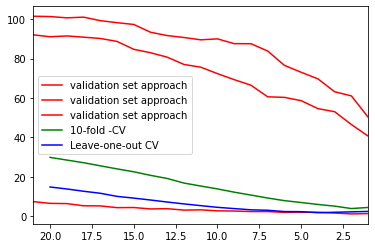

In [94]:
x = [[x] for x in np.linspace(-4, 4, 51)]
y = [[i[0] ** 2 + np.random.normal(0, 1.15)] for i in x]

ValidationSetApproach(x, y)
KfoldCrossValidation(x, y, 10)
leave_one_cross_validation(x, y)
plt.xlim(21, 1)
plt.legend()
plt.show()




